#### **WhatsApp Chat Analysis in Streamlit**

This notebook will guide you through building a **Streamlit app** to analyze WhatsApp chat data. The app allows users to upload their WhatsApp chat exports and provides various insights, such as message frequency, sentiment analysis, and the most active users.

#### **WhatsApp Chat Data Processing**

In this notebook, we process a WhatsApp chat data file using regular expressions and `pandas` to clean and structure the data for further analysis.

#### **Import Libraries** 

We will use `re` for regular expressions and `pandas` for data manipulation.

In [26]:
import re
import pandas as pd # type: ignore

f = open("WhatsApp Chat with Group discussion(AI).txt", "r", encoding="utf-8")
data=f.read()

# Regex pattern to match the chat log format
pattern = r"(\d{2}/\d{2}/\d{4}),\s(\d{1,2}:\d{2}\s?[ap]m)\s-\s(\+\d{2}\s\d{3}\s\d{7}):\s(.*)"

# Assuming `data` is the raw chat log string
matches = re.findall(pattern, data)

# Create a DataFrame from the extracted matches
df = pd.DataFrame(matches, columns=['Date', 'Time', 'User', 'Message'])

# Split the 'Date' column into 'Day', 'Month', 'Year'
df[['Day', 'Month', 'Year']] = df['Date'].str.split('/', expand=True)

# Convert 'Date' to datetime format to extract the day name and month name
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extract the Day name (e.g., Monday, Tuesday)
df['Day'] = df['Date'].dt.strftime('%A')  # Get the day name (e.g., "Monday")

# Extract the Month name (e.g., January, February)
df['Month'] = df['Date'].dt.strftime('%B')  # Get the full month name (e.g., "July")

# Clean up and split the 'Time' column into 'Hour', 'Minute', and 'AMPM'
df['Time'] = df['Time'].str.replace('\u202f', ' ')  # Remove non-breaking spaces

# Split the cleaned 'Time' column into 'Hour:Minute' and 'AMPM'
df[['Hour_Minute', 'AMPM']] = df['Time'].str.extract(r'(\d{1,2}:\d{2})\s?(am|pm)', expand=True)

# Split the 'Hour_Minute' into 'Hour' and 'Minute'
df[['Hour', 'Minute']] = df['Hour_Minute'].str.split(':', expand=True)

# Drop the original 'Date' and 'Time' columns if you don't need them anymore
df = df.drop(columns=['Date', 'Time', 'Hour_Minute'])

# Display the DataFrame
df.head()


,User,Message,Day,Month,Year,AMPM,Hour,Minute
0,+92 303 6123098,Assalamualaikum wa rehmatullahi wa baraktuh,Thursday,July,2024,pm,6,39
1,+92 303 6123098,Agr koe kr skta to mjy bta dyn Mai unko cv per...,Thursday,July,2024,pm,6,40
2,+92 328 9460713,<Media omitted>,Thursday,July,2024,pm,9,36
3,+92 328 9460713,"Remember Brothers, Don't miss it !",Thursday,July,2024,pm,9,38
4,+92 310 8668380,<Media omitted>,Friday,July,2024,am,3,18


### **2. Basic Statistics** ###

In [27]:
df.describe()

,User,Message,Day,Month,Year,AMPM,Hour,Minute
count,960,960,960,960,960,960,960,960
unique,103,738,7,5,1,2,12,60
top,+92 307 7789508,<Media omitted>,Thursday,August,2024,pm,11,02
freq,88,145,247,324,960,708,136,39


In [28]:
# Basic stats and general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User     960 non-null    object
 1   Message  960 non-null    object
 2   Day      960 non-null    object
 3   Month    960 non-null    object
 4   Year     960 non-null    object
 5   AMPM     960 non-null    object
 6   Hour     960 non-null    object
 7   Minute   960 non-null    object
dtypes: object(8)
memory usage: 60.1+ KB


In [29]:
df.shape

(960, 8)

#### **Analyzing Unique Users in a Dataset**

In [30]:
# Step 3: Extract unique users
unique_users = df['User'].unique().tolist()

# Step 4: Remove system-generated notifications
if 'group_notification' in unique_users:
    unique_users.remove('group_notification')

# Step 5: Sort users alphabetically and add "Overall" option at the start
unique_users.sort()
unique_users.insert(0, "Overall")
unique_users



['Overall',
 '+92 300 4974756',
 '+92 300 6372500',
 '+92 300 7045809',
 '+92 300 8760724',
 '+92 300 9480599',
 '+92 302 1104820',
 '+92 302 6188000',
 '+92 302 6550280',
 '+92 302 6791109',
 '+92 303 6123098',
 '+92 304 1933595',
 '+92 304 4770248',
 '+92 304 5561462',
 '+92 304 6510483',
 '+92 305 1859128',
 '+92 305 2142860',
 '+92 305 7933007',
 '+92 306 4258670',
 '+92 306 6785416',
 '+92 306 9287947',
 '+92 307 3732356',
 '+92 307 4641982',
 '+92 307 7789508',
 '+92 308 3769685',
 '+92 308 7112492',
 '+92 309 2095756',
 '+92 309 3108513',
 '+92 309 7095014',
 '+92 310 4361015',
 '+92 310 4943542',
 '+92 310 8668380',
 '+92 311 1323932',
 '+92 311 9396966',
 '+92 312 3478519',
 '+92 312 9581399',
 '+92 313 1029011',
 '+92 313 2040046',
 '+92 313 4997451',
 '+92 314 1721775',
 '+92 315 1521759',
 '+92 315 4292972',
 '+92 315 4534792',
 '+92 317 1476609',
 '+92 317 9661942',
 '+92 319 6457650',
 '+92 319 7200178',
 '+92 320 8587480',
 '+92 320 9099349',
 '+92 321 2226008',
 '+92 32

In [31]:
# Step 6: Display the specified user if they exist
specific_user = "+92 300 4974756"
if specific_user in unique_users:
    print(f"User '{specific_user}' is in the list.")
else:
    print(f"User '{specific_user}' is not in the list.")

User '+92 300 4974756' is in the list.


#### **Fetching User Stats for WhatsApp Data**


In [32]:
from urlextract import URLExtract # type: ignore
from collections import Counter
import emoji # type: ignore
from wordcloud import WordCloud # type: ignore

# Create an object that will help in extracting URLs
extract = URLExtract()

class Helper:
    def __init__(self, df):
        """
        Initializes the Helper class with a DataFrame containing WhatsApp data.
        
        Parameters:
            df (pd.DataFrame): The DataFrame containing the WhatsApp data.
        """
        self.df = df

    def fetch_stats(self, selected_user):
        """
        Fetch basic statistics for a selected user or for all users if 'Overall' is selected.

        Parameters:
            selected_user (str): The user to fetch stats for, or 'Overall' for aggregate stats.

        Returns:
            tuple: A tuple containing the number of messages, number of words, 
                   number of media messages, and number of links shared.
        """
        # Ensure selected_user is a string (in case it's a pandas Series)
        if not isinstance(selected_user, str):
            raise ValueError("selected_user should be a string")

        # If the selected user is not 'Overall', filter the data for that specific user
        if selected_user != 'Overall':
            df_filtered = self.df[self.df['User'] == selected_user]
        else:
            df_filtered = self.df  # Use entire DataFrame for 'Overall' stats

        # Count how many messages the selected user has sent
        num_messages = df_filtered.shape[0]

        # Create a list to hold all words from the messages
        words = []
        for message in df_filtered['Message']:
            words.extend(message.split())

        # Count how many media messages (like images or videos) the user sent
        num_media_messages = df_filtered[df_filtered['Message'] == '<Media omitted>'].shape[0]

        # Create a list to hold all the links shared by the user
        links = []
        for message in df_filtered['Message']:
            links.extend(extract.find_urls(message))

        # Return the statistics: total messages, word count, media count, link count
        return num_messages, len(words), num_media_messages, len(links)


In [33]:
helper = Helper(df)


In [34]:
# Fetch stats for a specific user (e.g., "User1")
user_stats = helper.fetch_stats(specific_user)


# Display the results for User1
print(F"Stats for User:{user_stats}")
print(f"Number of messages: {user_stats[0]}")
print(f"Number of words: {user_stats[1]}")
print(f"Number of media messages: {user_stats[2]}")
print(f"Number of links shared: {user_stats[3]}")
# Fetch overall stats (aggregated for all users)


Stats for User:(4, 94, 0, 0)
Number of messages: 4
Number of words: 94
Number of media messages: 0
Number of links shared: 0


In [35]:
# Fetch overall stats (aggregated for all users)
overall_stats = helper.fetch_stats("Overall")

# Display the overall stats
print("\nOverall Stats:")
print(f"Number of messages: {overall_stats[0]}")
print(f"Number of words: {overall_stats[1]}")
print(f"Number of media messages: {overall_stats[2]}")
print(f"Number of links shared: {overall_stats[3]}")



Overall Stats:
Number of messages: 960
Number of words: 7960
Number of media messages: 145
Number of links shared: 52


#### **Visualizing Top 5 Most Active Users in Groups**

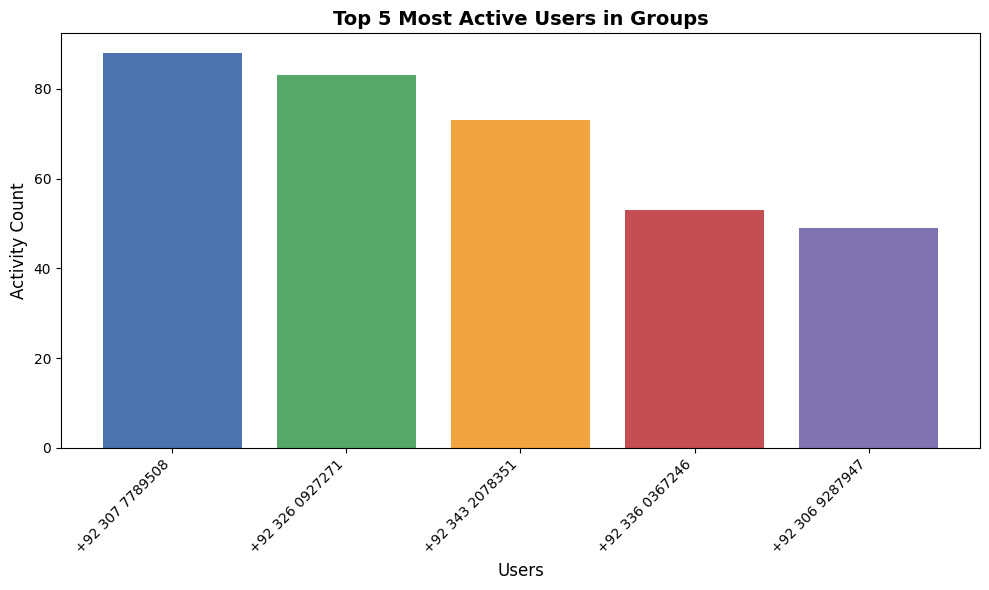

In [39]:
import matplotlib.pyplot as plt  # type: ignore


x=df['User'].value_counts().head()

# Assuming 'x' is a pandas Series with index as users and values as counts
name = x.index
count = x.values

# Set figure size for better visualization
plt.figure(figsize=(10, 6))

# Create a bar chart with customized colors and more aesthetically pleasing style
plt.bar(name, count, color=['#4C72B0', '#55A868', '#F1A340', '#C44E52', '#8172B2'])

# Add labels and title with improved font size and style
plt.xlabel("Users", fontsize=12)
plt.ylabel("Activity Count", fontsize=12)
plt.title("Top 5 Most Active Users in Groups", fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout to avoid overlap and improve clarity
plt.tight_layout()

# Show the plot
plt.show()
